In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [19]:
# KMeans cluster
from sklearn.cluster import KMeans
# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go

In [20]:
df=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# we found 5 attribute colums in above dataset

In [21]:
df.shape

(200, 5)

In [22]:
# Missing value situation
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [24]:
# description of statistics info is mainly to view of the value of numerical data 
# related to statistical parameters 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
# 1、set plot style
plt.style.use("fivethirtyeight")

# 2、 take out 3 cols importantly analysis 
cols = df.columns[2:].tolist()
cols
# result
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

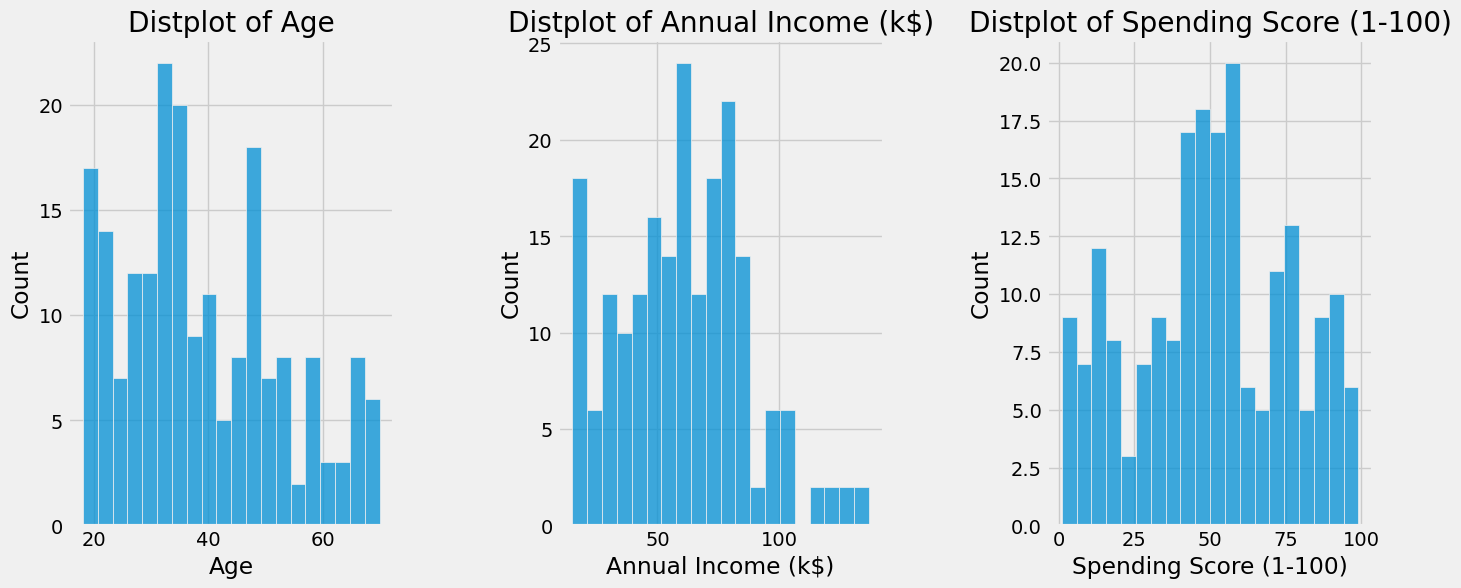

In [26]:
#view'Age'、 'Annual Income (k$)'、 'Spending Score (1-100)'histgarm, check them distribution：
# plot
plt.figure(1, figsize=(15,6))
n=0

for col in cols:
    n += 1 # sub position
    plt.subplot(1,3,n)  
    plt.subplots_adjust(hspace=0.5,wspace=0.5)  # adjust
    sns.histplot(df[col],bins=20)  
    plt.title(f'Distplot of {col}') 
plt.show()  

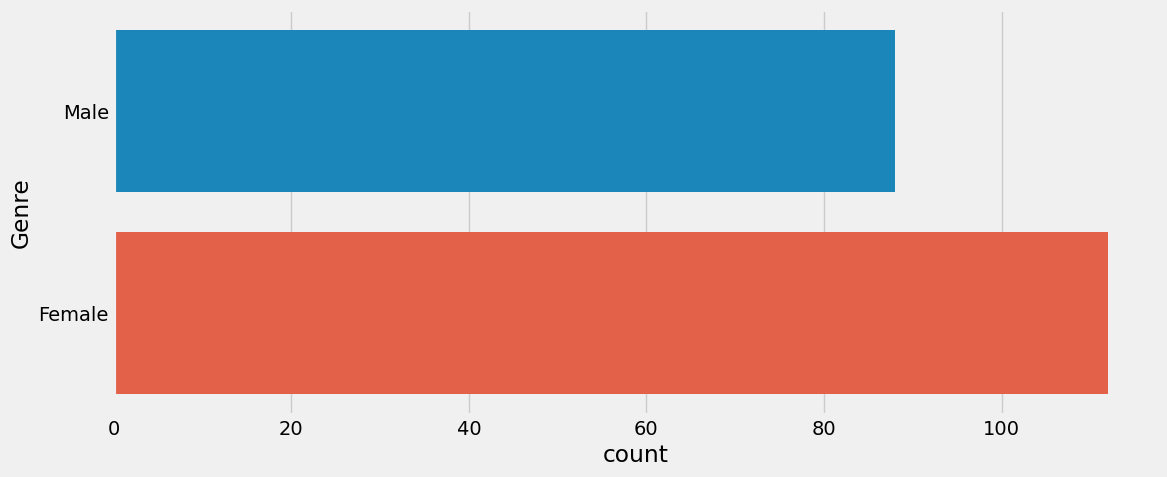

In [27]:
# view how many male and female in this dataset, after that will consider whether sex influence to whole analysis
plt.figure(1, figsize=(12,5))

sns.countplot(y="Genre", data=df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


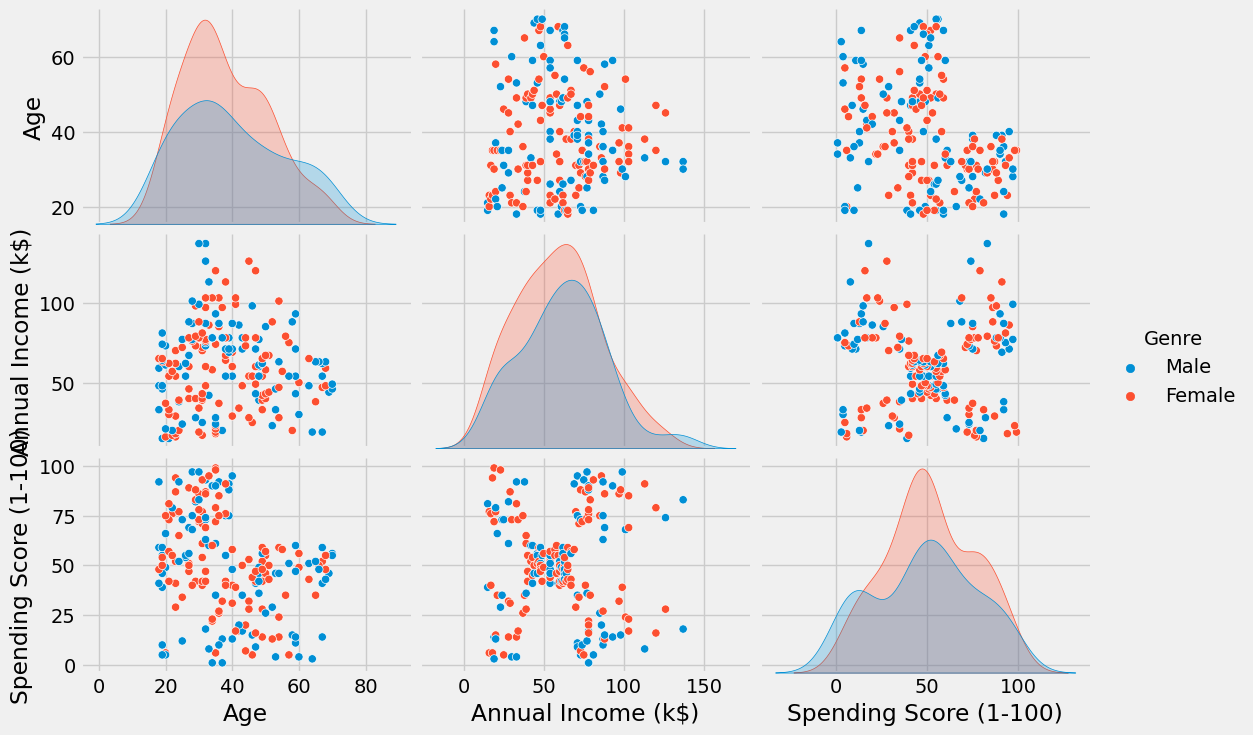

In [28]:
# data distribution under of different sex
sns.pairplot(df.drop(["CustomerID"], axis=1),
            hue="Genre",
            aspect=1.5)
plt.show()
# Through the bivariate distribution above, we funded it: sex has little effect on the other three fields

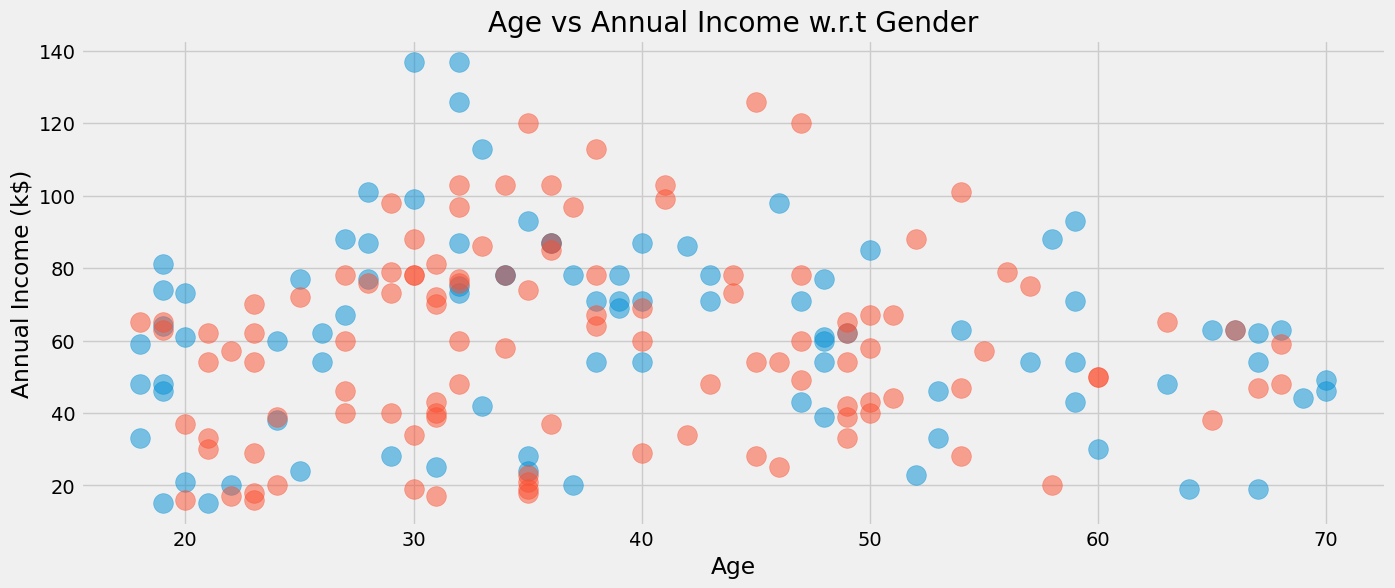

In [29]:
#The relationship between age and average income by sex
plt.figure(1,figsize=(15,6))  

for gender in ["Male", "Female"]:
    plt.scatter(x="Age", y="Annual Income (k$)",
                data=df[df["Genre"] == gender], 
                s=200,alpha=0.5,label=gender  # scatter size,alpha,label classify
               )
    
plt.xlabel("Age")  
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income w.r.t Gender")

plt.show()

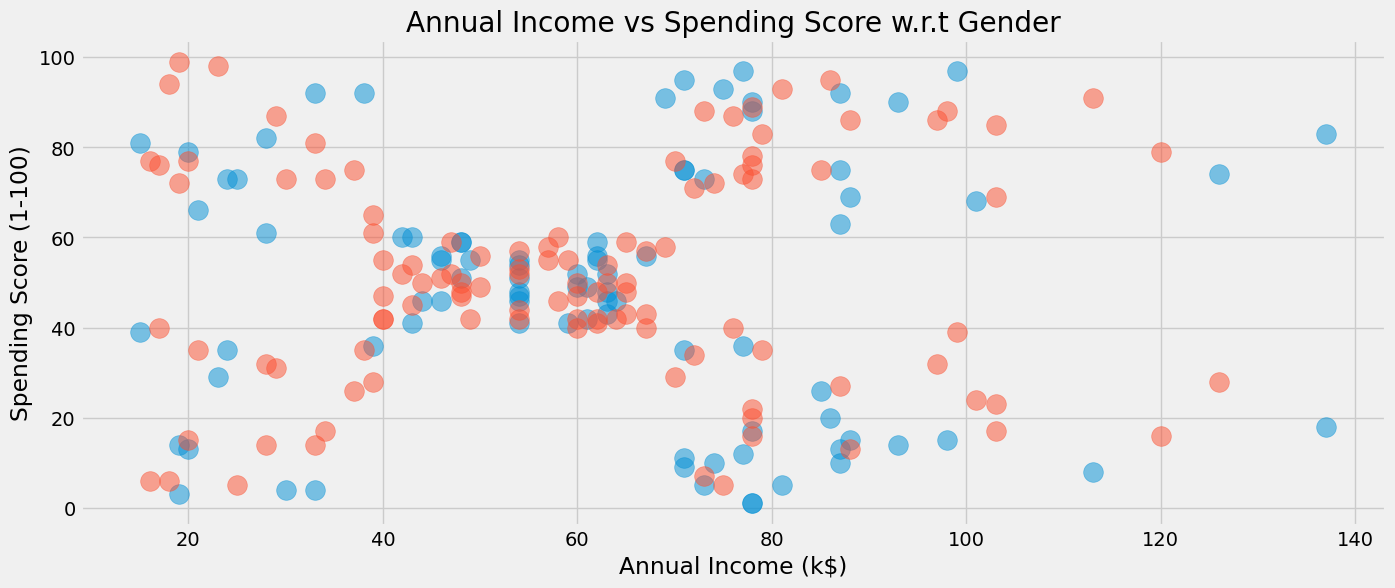

In [30]:
# The relationship between average income and spending score by different sex
plt.figure(1,figsize=(15,6))

for gender in ["Male", "Female"]:  # 解释参考上面
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',
                data=df[df["Genre"] == gender],
                s=200,alpha=0.5,label=gender)
    
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title("Annual Income vs Spending Score w.r.t Gender")
plt.show()

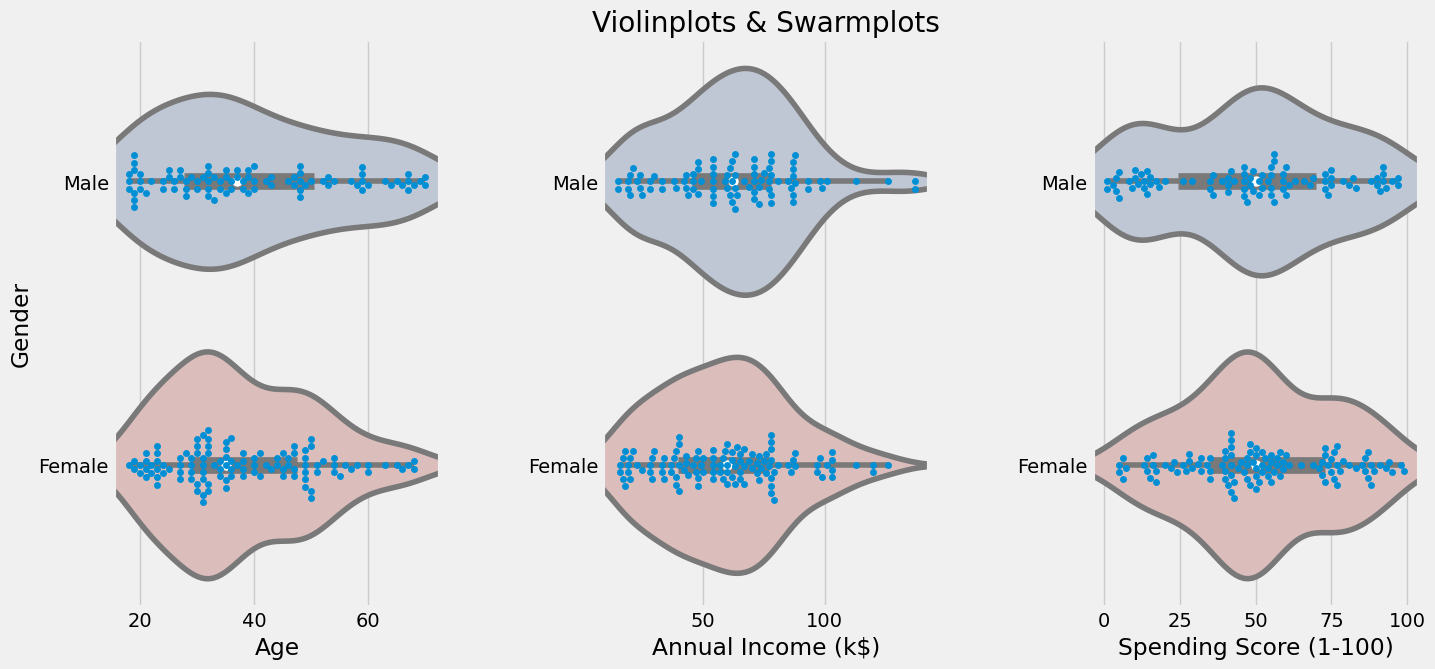

In [31]:
# observe the distribution of data by violinplots and clustered scatter plots: the distribution of data by gender
# Swarmplots
# violinplot

plt.figure(1,figsize=(15,7))
n = 0

for col in cols:
    n += 1  
    plt.subplot(1,3,n)  # No.n subplot
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=col,y="Genre",data=df,palette = "vlag") 
    sns.swarmplot(x=col, y="Genre",data=df)
    plt.ylabel("Gender" if n == 1 else '')
    plt.title("Violinplots & Swarmplots" if n == 2 else '')
    
plt.show()

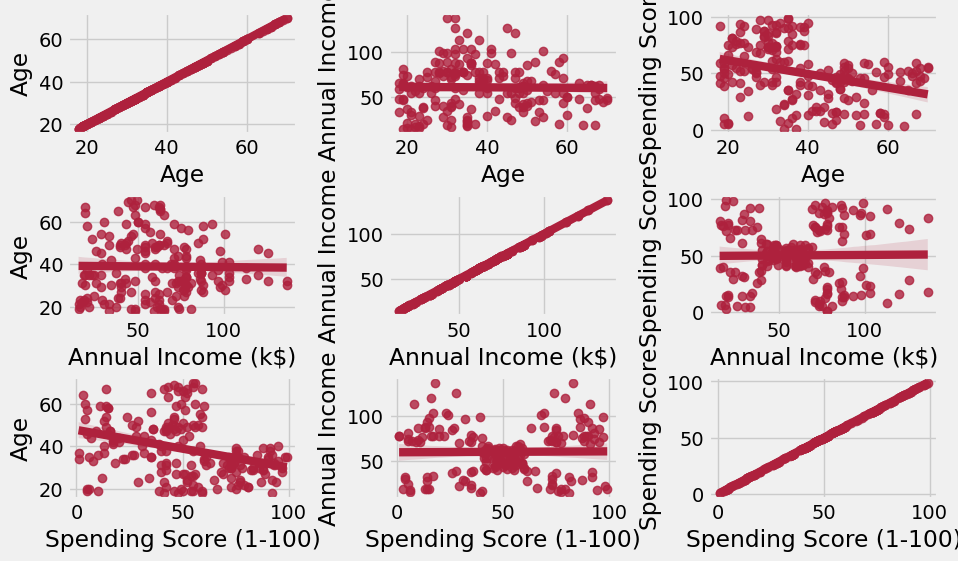

In [32]:
# Observe for outliers, anormal number, etc
# attribute related analysis
# It is mainly to observe the regression between the two attributes:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  

plt.figure(1,figsize=(10,6))
n = 0

for x in cols:
    for y in cols:
        n += 1  
        plt.subplot(3,3,n)  # 3*3 matric
        plt.subplots_adjust(hspace=0.5, wspace=0.4) 
        sns.regplot(x=x,y=y,data=df,color="#AE213D") 
        plt.ylabel(y.split()[0] + " " + y.split()[1] if len(y.split()) > 1 else y)
        
plt.show()

In [34]:
# Clustering between two attributes
# choice the k value
df1 = df[['Age' , 'Spending Score (1-100)']].iloc[:,:].values  # waiting fit data
inertia = []   # empty list，use it stored the sum of the distances to the center of mass 

for k in range(1,11):  # The default value for k is between 1 and 10, and the experience value is 5 or 10
    algorithm = (KMeans(n_clusters=k,  # k value
                       init="k-means++",  # initial algorithm
                       n_init=10,  # random run frequency
                       max_iter=300,  # maximum literaions
                       tol=0.0001,  # minimum error
                       random_state=111,  # random seed
                       algorithm="full"))  # algorithm choice auto、full、elkan
    algorithm.fit(df1)  # fit data
    inertia.append(algorithm.inertia_)  # sum of the center
    
inertia

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.p

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23839.439633173843,
 19576.013221355326,
 15514.193134351035,
 13020.333585858589,
 11480.045478271728,
 10187.846101364521]

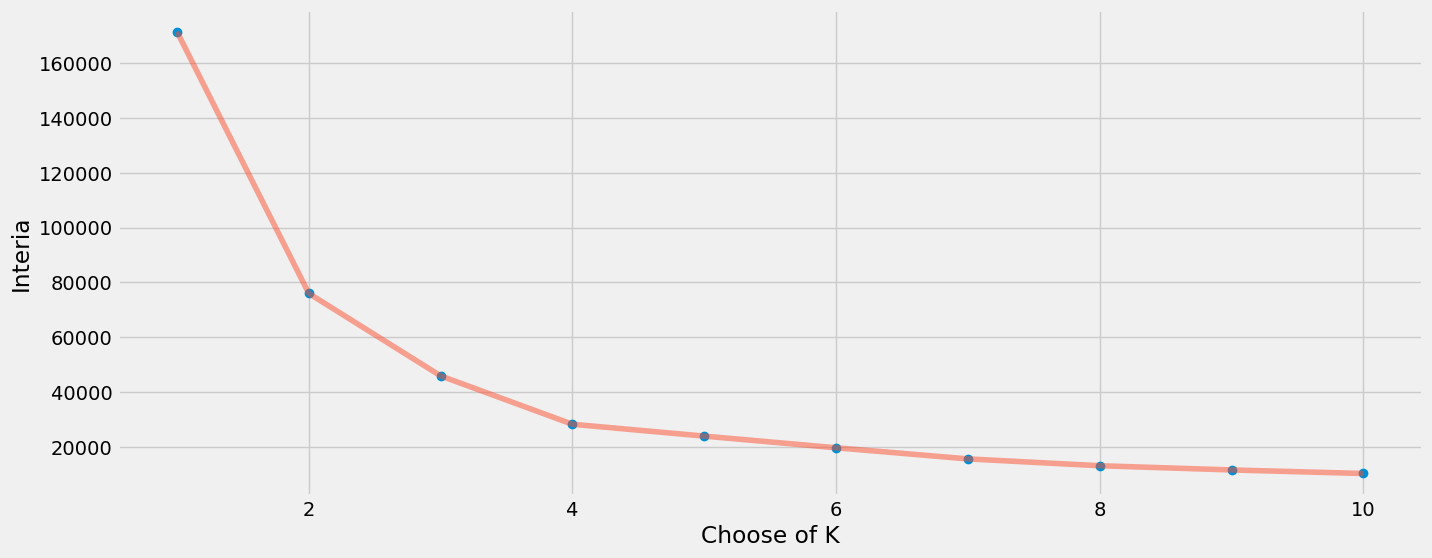

In [35]:
#Plot the change in K as a function of the sum of the distance from the center of mass:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')  # plot twice , different mark
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)

plt.xlabel("Choose of K")
plt.ylabel("Interia")
plt.show()

## In the end, we found that K = 4 was appropriate. K = 4 is used to fit the data

In [36]:
# clustering build the model
algorithm = (KMeans(n_clusters=4,  # k=4
                       init="k-means++",
                       n_init=10,
                       max_iter=300,
                       tol=0.0001,
                       random_state=111,
                       algorithm="elkan"))
algorithm.fit(df1)  # simulated data

KMeans(algorithm='elkan', n_clusters=4, n_init=10, random_state=111)

In [37]:
# 数据进行了fit操作之后，我们得到了标签label和4个质心：
labels1 = algorithm.labels_  # result
centroids1 = algorithm.cluster_centers_  # in the end the position of center 

print("labels1:", labels1)
print("centroids1:", centroids1)

labels1: [0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
centroids1: [[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


In [38]:
df3=pd.DataFrame(df1,columns=["Age", "Spending Score (1-100)"])
df3

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [39]:
df3["Labels"]=labels1
df3

,Age,Spending Score (1-100),Labels
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


In [40]:
# visualiz result
px.scatter(df3,x="Age",y="Spending Score (1-100)",color="Labels",color_continuous_scale="rainbow")

In [42]:
# 3 attributes clustering
# depend on Age 、 Annual Income 、 Spending Score
# same function like above it

X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values  # choice 3 filed
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n,
                        init='k-means++', 
                        n_init = 10 ,
                        max_iter=300, 
                        tol=0.0001,  
                        random_state= 111  , 
                        algorithm='full') )
    algorithm.fit(X3)   
    inertia.append(algorithm.inertia_)

inertia

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed 

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556198,
 75493.84464013917,
 58300.44332159069,
 51153.28301583999,
 44344.28038043038,
 40622.67755719132,
 37391.792196400085]

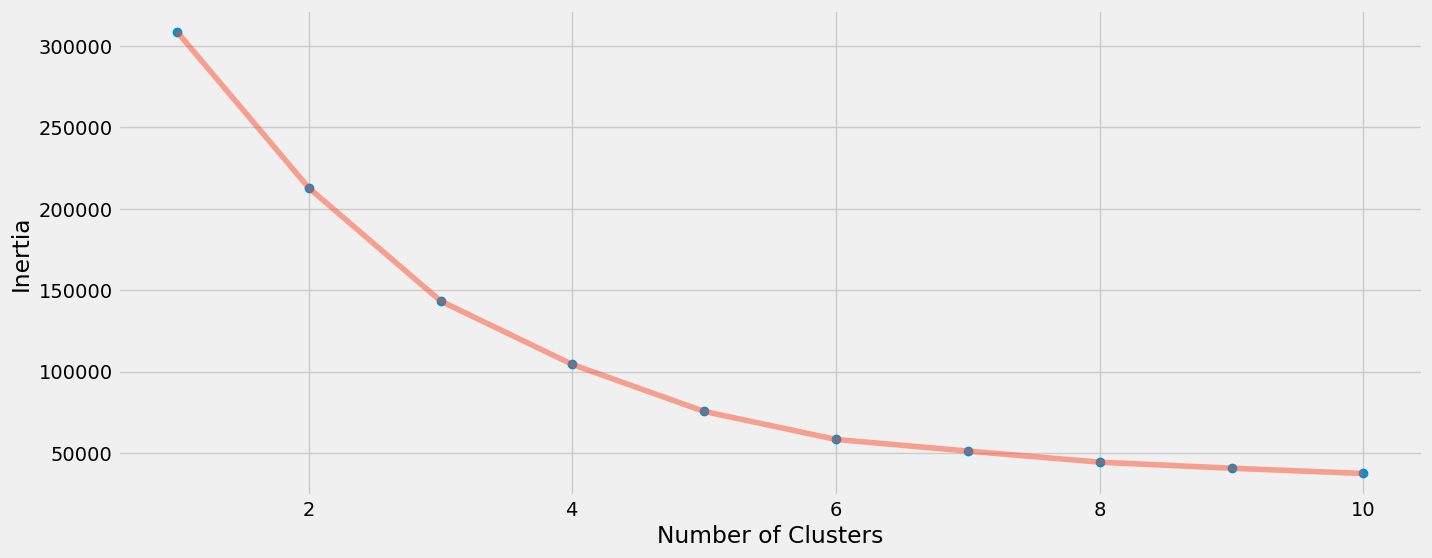

In [43]:
# plot the elbow chart decide k value：
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [44]:
# In the end ,we chooce k = 6
algorithm = (KMeans(n_clusters=6,  
                    init="k-means++",
                    n_init=10,
                    max_iter=300,
                    tol=0.0001,
                    random_state=111,
                    algorithm="full"))
algorithm.fit(df3)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

print(labels2)
print(centroids2)

[3 1 2 1 3 1 2 4 5 1 5 4 5 1 2 1 3 1 5 4 3 1 5 1 5 4 5 1 3 4 5 1 5 4 5 1 5
 1 2 1 0 4 0 1 5 1 0 3 3 3 0 1 3 0 0 0 0 0 3 0 0 3 0 0 0 1 0 0 1 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 1 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 4 3 1 3 4 5 1 5 1 3 1 2 4 5 1 2 1 5 4 3 4 2 4 0 1
 2 4 5 4 5 1 5 4 2 1 2 1 0 4 2 4 5 1 5 4 2 1 2 1 2 4 5 4 5 1 5 4 3 4 5 4 3
 4 5 1 5 4 2 1 2 4 5 1 5 1 2 4]
[[55.9787234  48.5106383   3.        ]
 [28.68421053 71.5         1.52631579]
 [31.         12.11764706  1.        ]
 [28.58536585 45.2195122   0.12195122]
 [31.28571429 90.39285714  2.        ]
 [50.82758621 15.5862069   1.        ]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



In [45]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [46]:
# We decided chooce plotly to display 3 dimension cluster：

df["labels2"] = labels2

trace = go.Scatter3d(
    x=df["Age"],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    
    marker = dict(
        color=df["labels2"],
        size=20,
        line=dict(color=df["labels2"],width=12),
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(l=0,r=0,b=0,t=0),
    title="six Clusters",
    scene=dict(
        xaxis=dict(title="Age"),
        yaxis = dict(title  = 'Spending Score'),
        zaxis = dict(title  = 'Annual Income')
    )
)

fig = go.Figure(data=data,layout=layout)

fig.show()